In [3]:
def fun1(inp):
 return inp+"from 1st funcion"

In [18]:
def fun3(inp):
 return inp

In [19]:
def fun2(inp):
 return inp+ fun3("output from fun3")+"from 2nd funcion"

In [20]:
from langgraph.graph import Graph

In [21]:
workflow1 =Graph()

In [22]:
workflow1.add_node("node1",fun1)
workflow1.add_node("node2",fun2)

In [23]:
workflow1.add_edge("node1","node2")

In [24]:
workflow1.set_entry_point("node1")

In [25]:
workflow1.set_finish_point("node2")

In [26]:
app1=workflow1.compile()

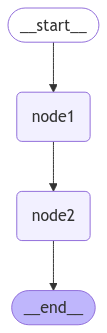

In [27]:
from IPython.display import Image,display

try:
    display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [28]:
input1= input("write input:")

app1.invoke(input1)

'hifrom 1st funcionoutput from fun3from 2nd funcion'

In [29]:
for output in app1.stream(input1):
    for key,value in output.items():
        print(f"output from {key}")
        print("----------")
        print(value)
        print("\n")

output from node1
----------
hifrom 1st funcion


output from node2
----------
hifrom 1st funcionoutput from fun3from 2nd funcion





Now lets create workflow with llm

In [30]:
from langchain_groq import ChatGroq
llm = ChatGroq(
    groq_api_key="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",
    model="llama3-8b-8192",
    

      temperature=0.5,
#     #  max_tokens=500,
# #     timeout=None,
# #     max_retries=2,
# #     # other params...
 )

In [31]:
def f1(inp):
    response=llm.invoke(inp).content
    return response

In [32]:

def f2(input):
    upper_case=input.upper()
    return upper_case

In [33]:
from langgraph.graph import Graph
workflow2=Graph()

In [35]:
workflow2.add_node("llm",f1)

In [36]:
workflow2.add_node("upper_string",f2)

In [37]:
workflow2.add_edge("llm","upper_string")

In [38]:

workflow2.set_entry_point("llm")
workflow2.set_finish_point("upper_string")

In [39]:

app2=workflow2.compile()

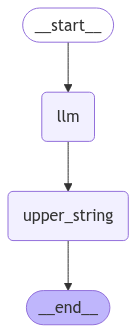

In [40]:

from IPython.display import Image, display

try:
    display(Image(app2.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [42]:
input2=input("query=")

app2.invoke(input2)

'THE FIRST PRIME MINISTER OF INDIA WAS JAWAHARLAL NEHRU. HE WAS SWORN INTO OFFICE ON AUGUST 15, 1947, WHEN INDIA GAINED INDEPENDENCE FROM BRITISH COLONIAL RULE. NEHRU SERVED AS THE PRIME MINISTER OF INDIA UNTIL HIS DEATH ON MAY 27, 1964.'

In [43]:
for output in app2.stream(input2):
    for key,value in output.items():
        print(f"output from {key}")
        print("----------")
        print(value)
        print("\n")

output from llm
----------
The first Prime Minister of India was Jawaharlal Nehru. He was sworn in as the Prime Minister of India on August 15, 1947, when India gained independence from British colonial rule.


output from upper_string
----------
THE FIRST PRIME MINISTER OF INDIA WAS JAWAHARLAL NEHRU. HE WAS SWORN IN AS THE PRIME MINISTER OF INDIA ON AUGUST 15, 1947, WHEN INDIA GAINED INDEPENDENCE FROM BRITISH COLONIAL RULE.




In [44]:

def f3(input):
    token=input.split()
    token_number=len(token)
    token_number=f"total token number is {token_number}"
    return token_number


output from token counter

In [45]:

workflow3=Graph()
workflow3.add_node("llm",f1)
workflow3.add_node("token_counter",f3)
workflow3.add_edge("llm","token_counter")
workflow3.set_entry_point("llm")
workflow3.set_finish_point("token_counter")
app3=workflow3.compile()

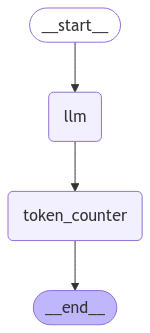

In [46]:

from IPython.display import Image, display

try:
    display(Image(app3.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [47]:
app3.invoke("what is a name of first indian prime minister?")

'total token number is 44'

In [48]:

app3.invoke("what is genai explain in detail?")

'total token number is 546'

In [49]:
input3=input("query=")
for output in app3.stream(input3):
    for key,value in output.items():
        print(f"output from {key}")
        print("----------")
        print(value)
        print("\n")


output from llm
----------
As of 2021, John Cena holds the record for the most WWE Championship reigns with 16 titles. He first won the championship on June 2, 2005, and his most recent reign was in 2021.

Here is the breakdown of John Cena's WWE Championship reigns:

1. June 2, 2005 - August 21, 2005 (83 days)
2. January 29, 2006 - April 2, 2006 (67 days)
3. August 20, 2006 - November 26, 2006 (94 days)
4. April 1, 2007 - June 24, 2007 (84 days)
5. November 18, 2007 - December 16, 2007 (28 days)
6. March 30, 2008 - April 5, 2008 (6 days)
7. September 13, 2009 - November 22, 2009 (70 days)
8. March 28, 2010 - June 20, 2010 (84 days)
9. July 18, 2011 - August 14, 2011 (27 days)
10. September 18, 2011 - November 20, 2011 (63 days)
11. December 18, 2011 - April 1, 2012 (84 days)
12. August 19, 2012 - November 18, 2012 (91 days)
13. June 16, 2013 - July 7, 2013 (21 days)
14. May 4, 2014 - June 29, 2014 (56 days)
15. August 24, 2015 - September 20, 2015 (27 days)
16. April 2, 2021 - present

rag in langgraph